In [1]:
from nptdms import TdmsFile
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

In [119]:
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 30
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [23]:
calibFactorY = 61.65 # V/um?
calibFactorX = 72.6027397260274 # V/um?

    
    

In [83]:
tFile=[]
for element in range(3):
    fileName = "/home/data_transfer/data_from_windows/Misc/VacuumTest_20211025/pumpdown%d.tdms" %(element+1)
    tFile.append(TdmsFile.read(fileName))

In [84]:
signalTDMS1 = tFile[0].as_dataframe(time_index=True)
signalTDMS2 = tFile[1].as_dataframe(time_index=True)
signalTDMS3 = tFile[2].as_dataframe(time_index=True)

In [85]:
len(signalTDMS1)/16

284.0

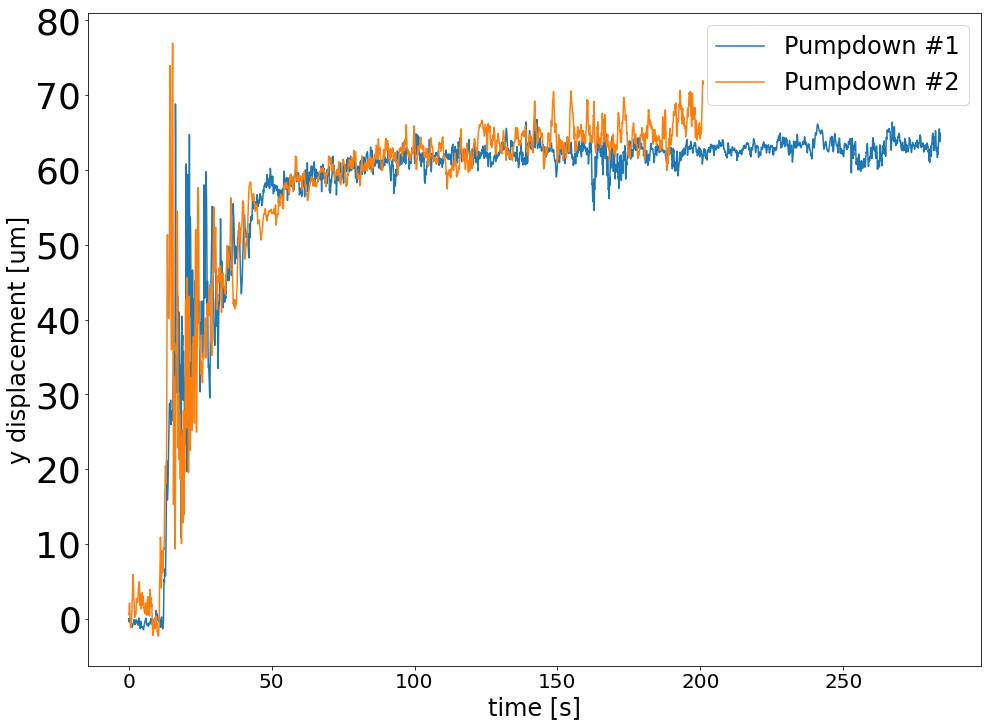

In [86]:
x1 = np.arange(0,len(signalTDMS1)/16,1/16)
x2 = np.arange(0,len(signalTDMS2[13:])/16,1/16)
pos1 = (signalTDMS1["/\'123\'/\'asm0\'"].ewm(span=1).mean()-signalTDMS1["/\'123\'/\'asm0\'"][0])*calibFactorY
pos2 = (signalTDMS2["/\'123\'/\'asm0\'"][13:].ewm(span=1).mean()-signalTDMS2["/\'123\'/\'asm0\'"][14])*calibFactorY

#plt.plot(signalTDMS["/\'123\'/\'asm2\'"])
#plt.plot(signalTDMS["/\'123\'/\'asm0\'"].ewm(span=20).mean())
plt.plot(x1,pos1,label="Pumpdown #1")
plt.plot(x2,pos2,label="Pumpdown #2")
plt.ylabel("y displacement [um]")
plt.xlabel("time [s]")
plt.legend()
plt.show()
#plt.plot(signalTDMS["/\'123\'/\'asm3\'"].ewm(span=20).mean())
#plt.plot(signalTDMS2["/\'123\'/\'asm3\'"].ewm(span=20).mean())

#plt.plot(signalTDMS["/\'ai\'/\'123\'"])

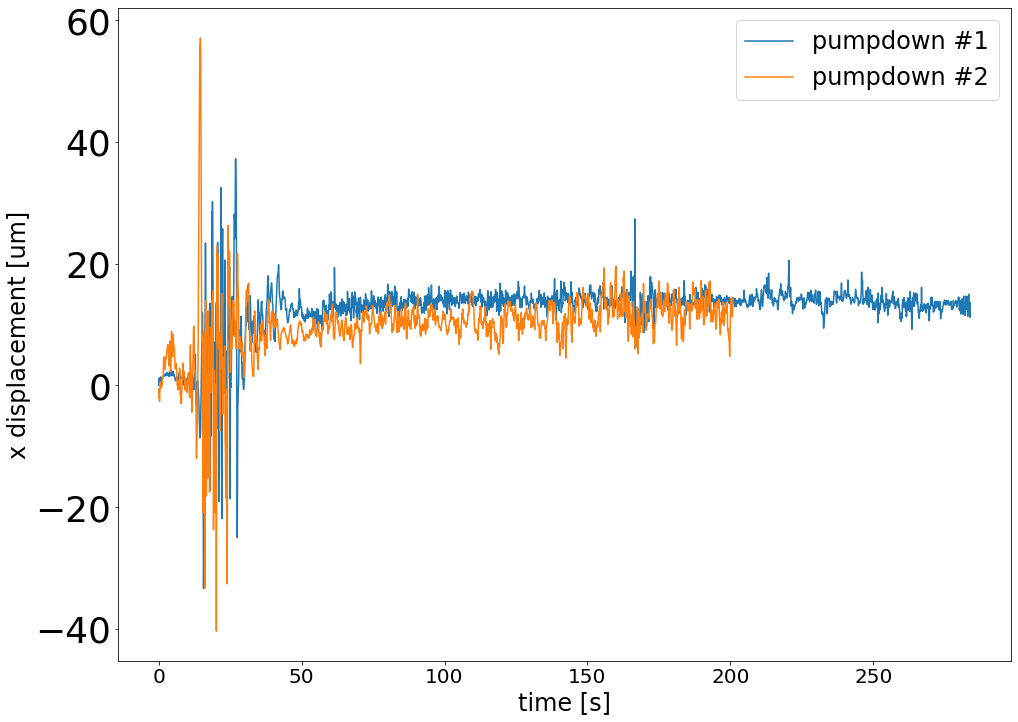

In [87]:
x1 = np.arange(0,len(signalTDMS1)/16,1/16)
x2 = np.arange(0,len(signalTDMS2[13:])/16,1/16)
pos1 = (signalTDMS1["/\'123\'/\'asm3\'"].ewm(span=1).mean()-signalTDMS1["/\'123\'/\'asm3\'"][0])*calibFactorX
pos2 = (signalTDMS2["/\'123\'/\'asm3\'"][13:].ewm(span=1).mean()-signalTDMS2["/\'123\'/\'asm3\'"][0])*calibFactorX

#plt.plot(signalTDMS["/\'123\'/\'asm2\'"])
#plt.plot(signalTDMS["/\'123\'/\'asm0\'"].ewm(span=20).mean())
plt.plot(x1,pos1,label="pumpdown #1")
plt.plot(x2,pos2,label="pumpdown #2")
plt.ylabel("x displacement [um]")
plt.xlabel("time [s]")
plt.legend()
plt.show()
#plt.plot(signalTDMS["/\'123\'/\'asm3\'"].ewm(span=20).mean())
#plt.plot(signalTDMS2["/\'123\'/\'asm3\'"].ewm(span=20).mean())

#plt.plot(signalTDMS["/\'ai\'/\'123\'"])

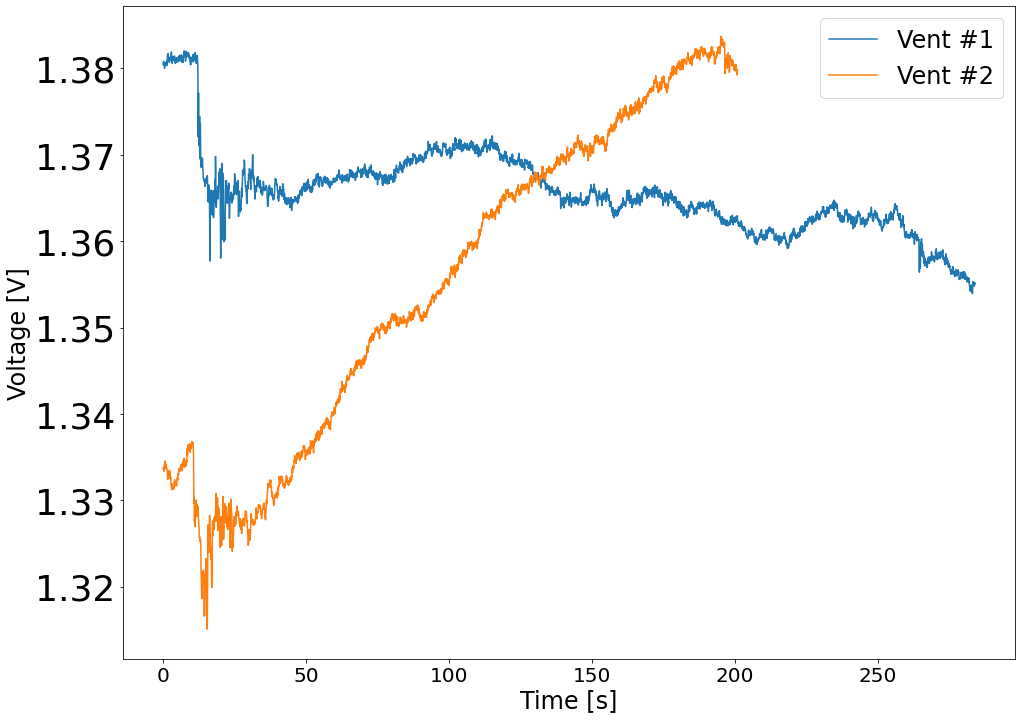

In [107]:
x1 = np.arange(0,len(signalTDMS1)/16,1/16)
x2 = np.arange(0,len(signalTDMS2[13:])/16,1/16)
pos1 = (signalTDMS1["/\'123\'/\'asm2\'"].ewm(span=1).mean())#-signalTDMS1["/\'123\'/\'asm2\'"][0])
pos2 = (signalTDMS2["/\'123\'/\'asm2\'"][13:].ewm(span=1).mean())#-signalTDMS2["/\'123\'/\'asm2\'"][0])

#plt.plot(signalTDMS["/\'123\'/\'asm2\'"])
#plt.plot(signalTDMS["/\'123\'/\'asm0\'"].ewm(span=20).mean())
plt.plot(x1,pos1,label="Vent #1")
plt.plot(x2,pos2,label="Vent #2")
plt.ylabel("Voltage [V]")
plt.xlabel("Time [s]")
plt.legend()
plt.show()
#plt.plot(signalTDMS["/\'123\'/\'asm3\'"].ewm(span=20).mean())
#plt.plot(signalTDMS2["/\'123\'/\'asm3\'"].ewm(span=20).mean())

#plt.plot(signalTDMS["/\'ai\'/\'123\'"])

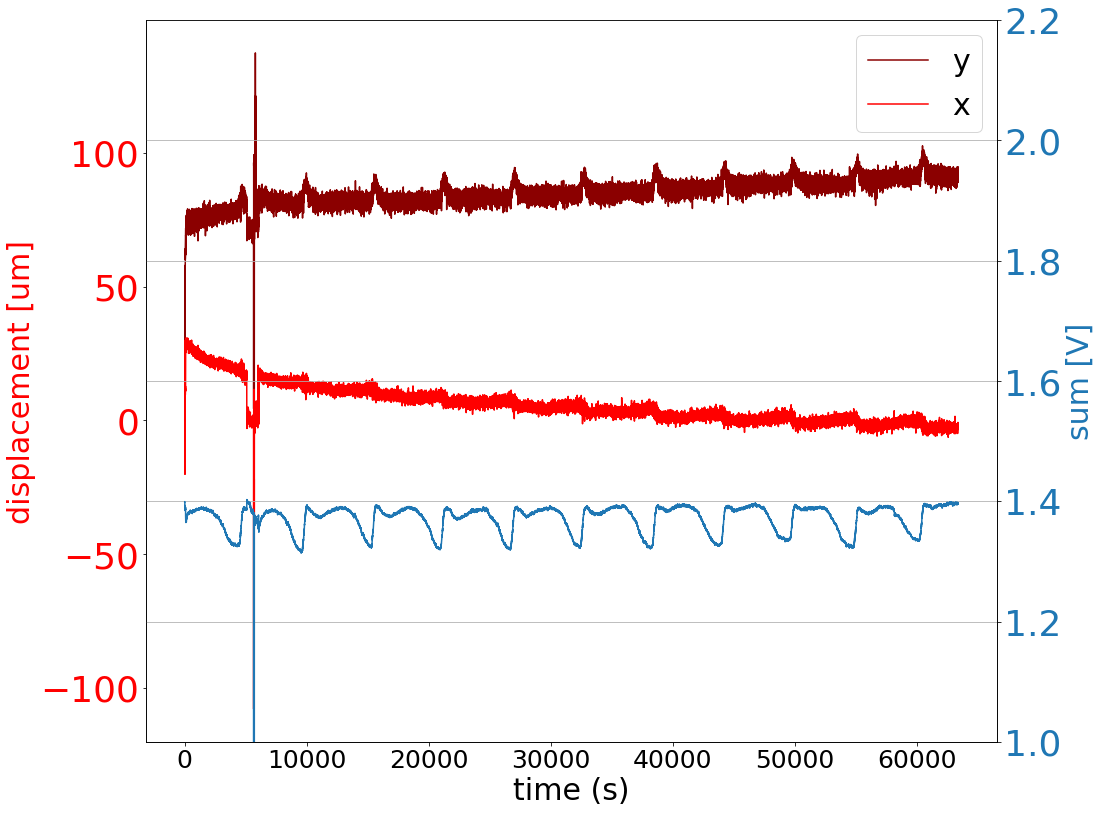

In [137]:
x = np.arange(0,len(signalTDMS3)/16,1/16)
pos1 = (signalTDMS3["/\'123\'/\'asm0\'"].ewm(span=16).mean()-signalTDMS3["/\'123\'/\'asm0\'"][0])*calibFactorY
pos2 = (signalTDMS3["/\'123\'/\'asm3\'"].ewm(span=16).mean()-signalTDMS3["/\'123\'/\'asm3\'"][0])*calibFactorX
pos3 = (signalTDMS3["/\'123\'/\'asm2\'"].ewm(span=16).mean())

fig, ax1 = plt.subplots()





ax1.set_xlabel('time (s)')
ax1.set_ylabel('displacement [um]', color='red')
ax1.plot(x, pos1, color="darkred",label="y")
ax1.plot(x, pos2, color="red",label="x")
ax1.legend()
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sum [V]', color=color)  # we already handled the x-label with ax1
ax2.plot(x, pos3, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set(ylim=(1.0,2.2))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()

In [89]:
tFile2=[]
for element in range(2):
    fileName = "/home/data_transfer/data_from_windows/Misc/VacuumTest_20211025/vent%d.tdms" %(element+1)
    tFile2.append(TdmsFile.read(fileName))

In [90]:
signal2TDMS1 = tFile2[0].as_dataframe(time_index=True)
signal2TDMS2 = tFile2[1].as_dataframe(time_index=True)


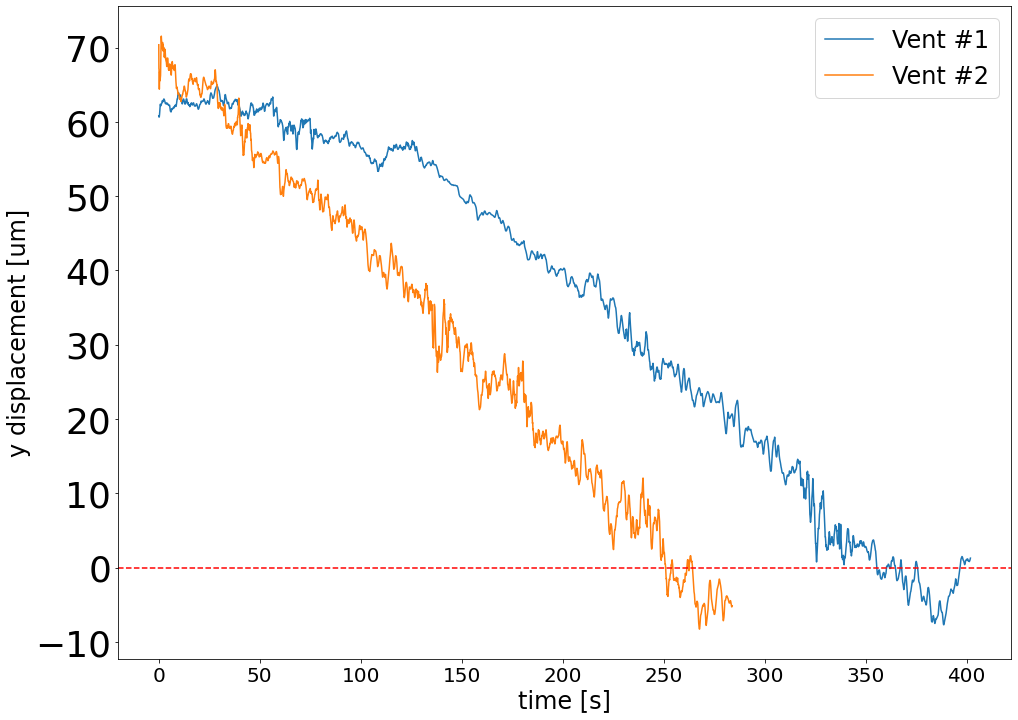

In [103]:
x1 = np.arange(0,len(signal2TDMS1)/16,1/16)
x2 = np.arange(0,len(signal2TDMS2)/16,1/16)
pos1 = (signal2TDMS1["/\'123\'/\'asm0\'"].ewm(span=20).mean()-signalTDMS1["/\'123\'/\'asm0\'"][0])*calibFactorY
pos2 = (signal2TDMS2["/\'123\'/\'asm0\'"].ewm(span=20).mean()-signalTDMS2["/\'123\'/\'asm0\'"][0])*calibFactorY

#plt.plot(signalTDMS["/\'123\'/\'asm2\'"])
#plt.plot(signalTDMS["/\'123\'/\'asm0\'"].ewm(span=20).mean())
plt.plot(x1,pos1,label="Vent #1")
plt.plot(x2,pos2,label="Vent #2")
plt.ylabel("y displacement [um]")
plt.xlabel("time [s]")
plt.axhline(0,linestyle="dashed",color="red")
plt.legend()
plt.show()
#plt.plot(signalTDMS["/\'123\'/\'asm3\'"].ewm(span=20).mean())
#plt.plot(signalTDMS2["/\'123\'/\'asm3\'"].ewm(span=20).mean())

#plt.plot(signalTDMS["/\'ai\'/\'123\'"])

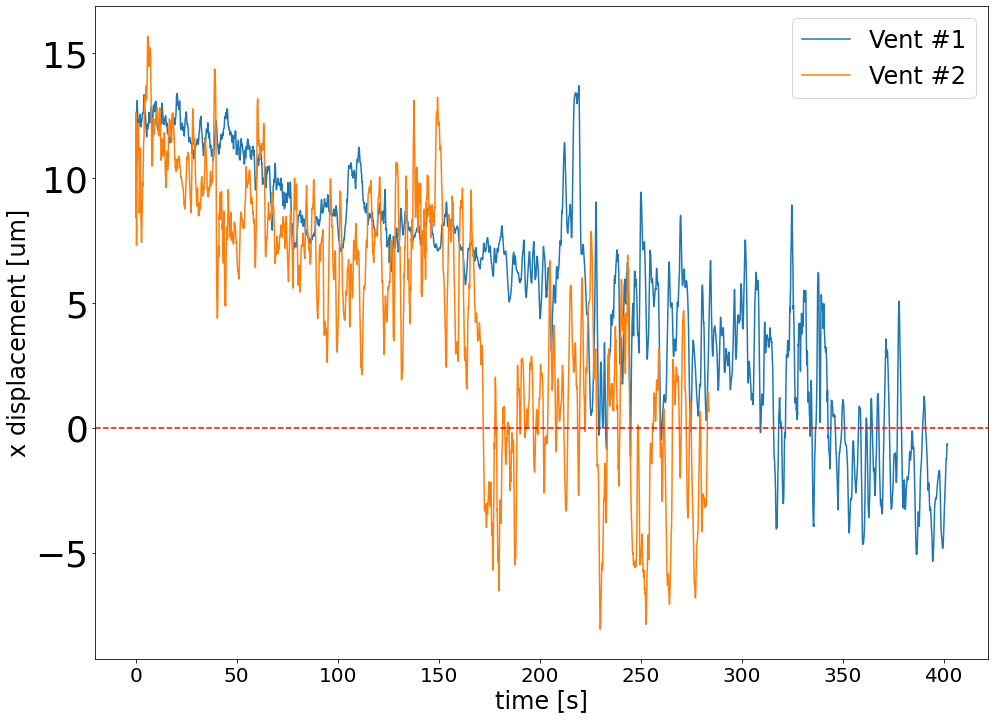

In [105]:
x1 = np.arange(0,len(signal2TDMS1)/16,1/16)
x2 = np.arange(0,len(signal2TDMS2)/16,1/16)
pos1 = (signal2TDMS1["/\'123\'/\'asm3\'"].ewm(span=20).mean()-signalTDMS1["/\'123\'/\'asm3\'"][0])*calibFactorX
pos2 = (signal2TDMS2["/\'123\'/\'asm3\'"].ewm(span=20).mean()-signalTDMS2["/\'123\'/\'asm3\'"][0])*calibFactorX

#plt.plot(signalTDMS["/\'123\'/\'asm2\'"])
#plt.plot(signalTDMS["/\'123\'/\'asm0\'"].ewm(span=20).mean())
plt.plot(x1,pos1,label="Vent #1")
plt.plot(x2,pos2,label="Vent #2")
plt.ylabel("x displacement [um]")
plt.xlabel("time [s]")
plt.axhline(0,linestyle="dashed",color="red")
plt.legend()
plt.show()
#plt.plot(signalTDMS["/\'123\'/\'asm3\'"].ewm(span=20).mean())
#plt.plot(signalTDMS2["/\'123\'/\'asm3\'"].ewm(span=20).mean())

#plt.plot(signalTDMS["/\'ai\'/\'123\'"])

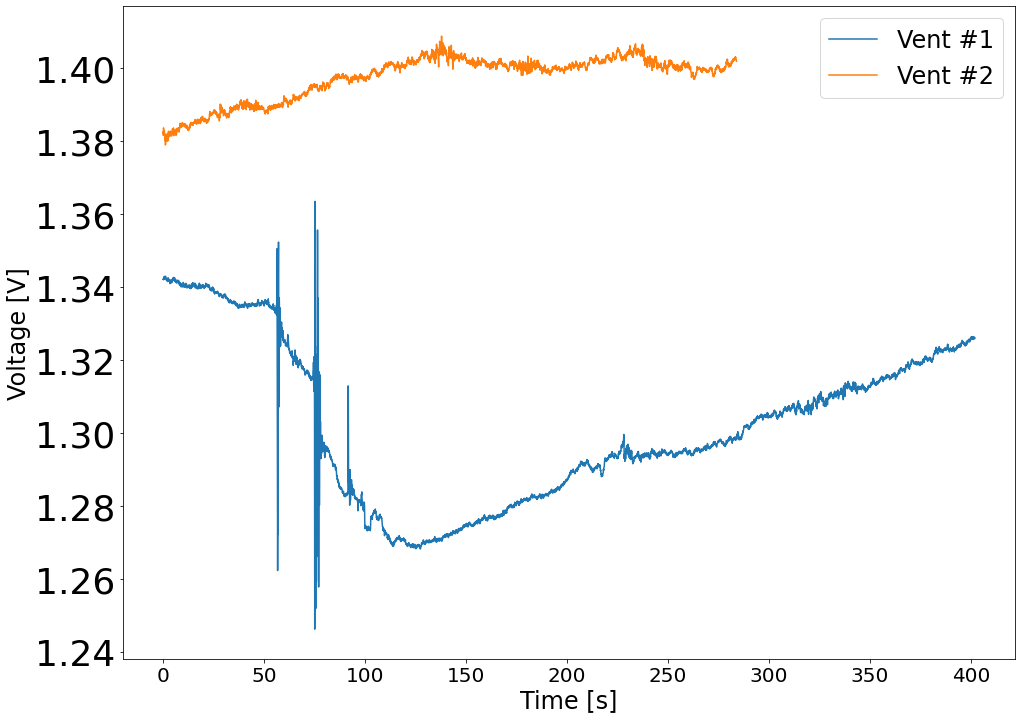

In [106]:
x1 = np.arange(0,len(signal2TDMS1)/16,1/16)
x2 = np.arange(0,len(signal2TDMS2)/16,1/16)
pos1 = (signal2TDMS1["/\'123\'/\'asm2\'"].ewm(span=1).mean())#-signalTDMS1["/\'123\'/\'asm2\'"][0])
pos2 = (signal2TDMS2["/\'123\'/\'asm2\'"].ewm(span=1).mean())#-signalTDMS2["/\'123\'/\'asm2\'"][0])

#plt.plot(signalTDMS["/\'123\'/\'asm2\'"])
#plt.plot(signalTDMS["/\'123\'/\'asm0\'"].ewm(span=20).mean())
plt.plot(x1,pos1,label="Vent #1")
plt.plot(x2,pos2,label="Vent #2")
plt.ylabel("Voltage [V]")
plt.xlabel("Time [s]")
plt.legend()
plt.show()
#plt.plot(signalTDMS["/\'123\'/\'asm3\'"].ewm(span=20).mean())
#plt.plot(signalTDMS2["/\'123\'/\'asm3\'"].ewm(span=20).mean())

#plt.plot(signalTDMS["/\'ai\'/\'123\'"])